# Load Clean Data 

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import export_text
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import graphviz
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [113]:
uber_dataset = pd.read_csv(r"data.csv")
uber_dataset

,Unnamed: 0,id,timestamp,hour,day,month,datetime,source,destination,cab_type,name,price,distance,surge_multiplier
0,0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0
1,1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0
2,2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0
3,3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0
4,4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637971,693065,353e6566-b272-479e-a9c6-98bd6cb23f25,1.543708e+09,23,1,12,2018-12-01 23:53:05,West End,North End,Uber,WAV,9.5,1.00,1.0
637972,693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,West End,North End,Uber,UberXL,13.0,1.00,1.0
637973,693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,West End,North End,Uber,UberX,9.5,1.00,1.0
637974,693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,West End,North End,Uber,Black SUV,27.0,1.00,1.0


In [115]:
uber_dataset.shape

(637976, 14)

/var/folders/43/30gtvzf54299gghzdyc8_l900000gn/T/ipykernel_13388/2633930544.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=uber_dataset, x='price', y='name', palette='rainbow', jitter=True, alpha=0.7)


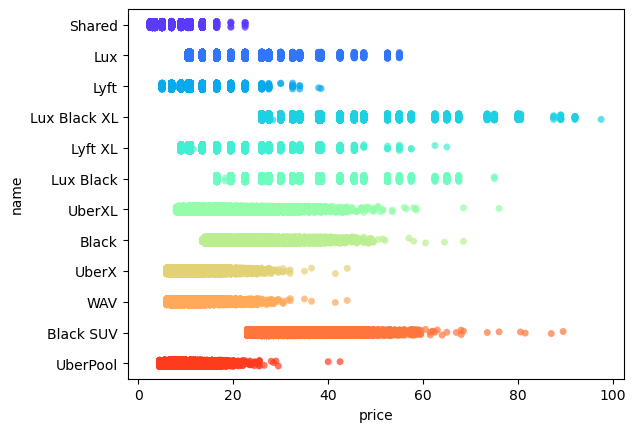

In [117]:
sns.stripplot(data=uber_dataset, x='price', y='name', palette='rainbow', jitter=True, alpha=0.7)
plt.show()

/var/folders/43/30gtvzf54299gghzdyc8_l900000gn/T/ipykernel_13388/4075399256.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=uber_dataset, x='price', y='cab_type', palette='rainbow', jitter=True, alpha=0.7)


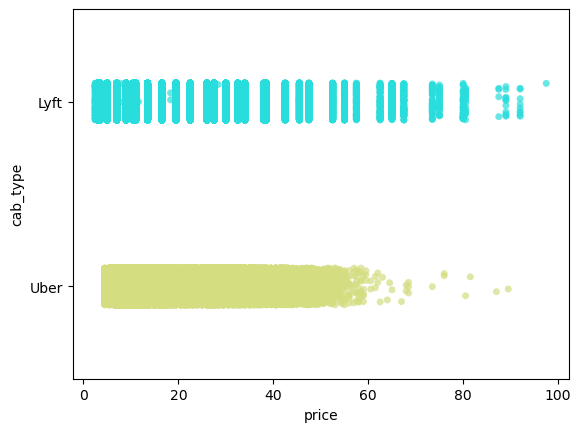

In [118]:
sns.stripplot(data=uber_dataset, x='price', y='cab_type', palette='rainbow', jitter=True, alpha=0.7)
plt.show()

In [ ]:
# Create a barplot for average prices based on surge_multiplier
import matplotlib.pyplot as plt
colors = plt.cm.rainbow(np.linspace(0, 1, len(uber_dataset)))
plt.bar(uber_dataset['surge_multiplier'], uber_dataset['price'], color=colors)

plt.xlabel('Surge Multiplier')
plt.ylabel('Average Price')
plt.title('Average Price by Surge Multiplier')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [122]:
object_df = uber_dataset.select_dtypes("object")
object_df

,id,datetime,source,destination,cab_type,name
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,2018-12-16 09:30:07,Haymarket Square,North Station,Lyft,Shared
1,4bd23055-6827-41c6-b23b-3c491f24e74d,2018-11-27 02:00:23,Haymarket Square,North Station,Lyft,Lux
2,981a3613-77af-4620-a42a-0c0866077d1e,2018-11-28 01:00:22,Haymarket Square,North Station,Lyft,Lyft
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,2018-11-30 04:53:02,Haymarket Square,North Station,Lyft,Lux Black XL
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,2018-11-29 03:49:20,Haymarket Square,North Station,Lyft,Lyft XL
...,...,...,...,...,...,...
637971,353e6566-b272-479e-a9c6-98bd6cb23f25,2018-12-01 23:53:05,West End,North End,Uber,WAV
637972,616d3611-1820-450a-9845-a9ff304a4842,2018-12-01 23:53:05,West End,North End,Uber,UberXL
637973,633a3fc3-1f86-4b9e-9d48-2b7132112341,2018-12-01 23:53:05,West End,North End,Uber,UberX
637974,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,2018-12-01 23:53:05,West End,North End,Uber,Black SUV


In [123]:
num_df = uber_dataset.select_dtypes("number")
num_df

,Unnamed: 0,timestamp,hour,day,month,price,distance,surge_multiplier
0,0,1.544953e+09,9,16,12,5.0,0.44,1.0
1,1,1.543284e+09,2,27,11,11.0,0.44,1.0
2,2,1.543367e+09,1,28,11,7.0,0.44,1.0
3,3,1.543554e+09,4,30,11,26.0,0.44,1.0
4,4,1.543463e+09,3,29,11,9.0,0.44,1.0
...,...,...,...,...,...,...,...,...
637971,693065,1.543708e+09,23,1,12,9.5,1.00,1.0
637972,693066,1.543708e+09,23,1,12,13.0,1.00,1.0
637973,693067,1.543708e+09,23,1,12,9.5,1.00,1.0
637974,693069,1.543708e+09,23,1,12,27.0,1.00,1.0


In [127]:
uber_dataset['name'].nunique()

12

In [129]:
label_encoder = preprocessing.LabelEncoder() 

uber_dataset['id']= label_encoder.fit_transform(uber_dataset['id']) 
uber_dataset['datetime']= label_encoder.fit_transform(uber_dataset['datetime'])
uber_dataset['destination']= label_encoder.fit_transform(uber_dataset['destination'])
uber_dataset['name']= label_encoder.fit_transform(uber_dataset['name'])
print("Class mapping of Name: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

uber_dataset['source']= label_encoder.fit_transform(uber_dataset['source'])

print("Class mapping of Source: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

uber_dataset['cab_type']= label_encoder.fit_transform(uber_dataset['cab_type'])

print("Class mapping of Cab: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)


Class mapping of Name: 
Black --> 0
Black SUV --> 1
Lux --> 2
Lux Black --> 3
Lux Black XL --> 4
Lyft --> 5
Lyft XL --> 6
Shared --> 7
UberPool --> 8
UberX --> 9
UberXL --> 10
WAV --> 11
Class mapping of Source: 
Back Bay --> 0
Beacon Hill --> 1
Boston University --> 2
Fenway --> 3
Financial District --> 4
Haymarket Square --> 5
North End --> 6
North Station --> 7
Northeastern University --> 8
South Station --> 9
Theatre District --> 10
West End --> 11
Class mapping of Cab: 
Lyft --> 0
Uber --> 1


In [131]:
uber_dataset.head()

,Unnamed: 0,id,timestamp,hour,day,month,datetime,source,destination,cab_type,name,price,distance,surge_multiplier
0,0,165097,1.544953e+09,9,16,12,25351,5,7,0,7,5.0,0.44,1.0
1,1,188776,1.543284e+09,2,27,11,961,5,7,0,2,11.0,0.44,1.0
2,2,378853,1.543367e+09,1,28,11,2534,5,7,0,5,7.0,0.44,1.0
3,3,485300,1.543554e+09,4,30,11,6988,5,7,0,4,26.0,0.44,1.0
4,4,558249,1.543463e+09,3,29,11,4400,5,7,0,6,9.0,0.44,1.0


In [133]:
uber_dataset.dtypes

Unnamed: 0            int64
id                    int64
timestamp           float64
hour                  int64
day                   int64
month                 int64
datetime              int64
source                int64
destination           int64
cab_type              int64
name                  int64
price               float64
distance            float64
surge_multiplier    float64
dtype: object

In [135]:
uber_dataset = uber_dataset[uber_dataset['price'].notna() & ~uber_dataset['price'].isin([float('inf'), -float('inf')])]
uber_dataset['price'] = uber_dataset['price'].astype(int)

In [137]:
uber_dataset['price'].head()

0     5
1    11
2     7
3    26
4     9
Name: price, dtype: int64

In [139]:
uber_dataset.isnull().sum()

Unnamed: 0          0
id                  0
timestamp           0
hour                0
day                 0
month               0
datetime            0
source              0
destination         0
cab_type            0
name                0
price               0
distance            0
surge_multiplier    0
dtype: int64

In [141]:
uber_dataset = uber_dataset.drop(columns = ['Unnamed: 0'], axis = 1)

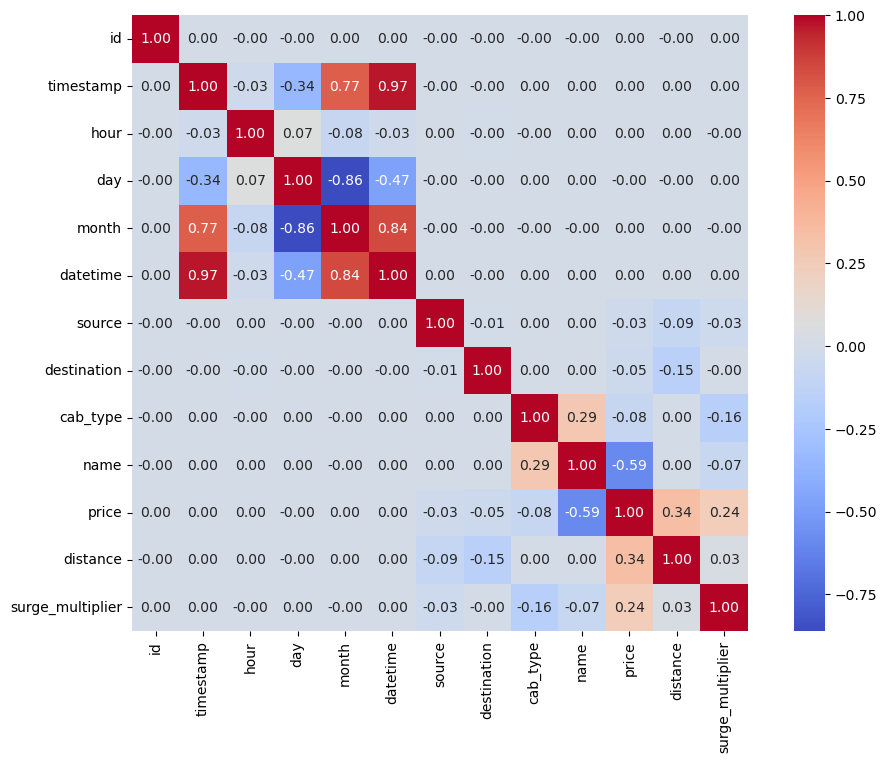

In [143]:
numeric_columns = uber_dataset.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_columns.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.show()

In [145]:
uber_dataset.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'source',
       'destination', 'cab_type', 'name', 'price', 'distance',
       'surge_multiplier'],
      dtype='object')

# KNN Model

In [ ]:
eature = uber_dataset[['cab_type', 'name', 'distance', 'surge_multiplier']]
target = uber_dataset['price']


In [168]:
#feature = uber_dataset.drop(columns = ['id', 'timestamp', 'hour', 'day', 'month', 'datetime','price','source', 'destination'], axis = 1)
# Selecting features and target variable
feature = uber_dataset[['cab_type', 'name', 'distance', 'surge_multiplier']]
target = uber_dataset['price']

X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size = 0.2, random_state = 42)
normalizer = MinMaxScaler()
normalizer.fit(X_train)

X_train_norm = normalizer.transform(X_train)
X_test_norm = normalizer.transform(X_test)

knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train_norm, y_train)

pred = knn.predict(X_test_norm)

knn_acuracy = knn.score(X_test_norm, y_test)
print("KNN Model Accuray:", knn_acuracy)

KNN Model Accuray: 0.9538996607532105


## Linear Regression

In [279]:
#X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size = 0.2, random_state = 42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

pred = lin_reg.predict(X_test)
print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", lin_reg.score(X_test, y_test))

MAE 5.13396190450613
RMSE 6.469992533463538
R2 score 0.5170346535792173


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [271]:
lin_reg.coef_

array([ 2.34263577, -1.61943635,  2.77405204, 20.3799545 ])

In [273]:
lin_reg.intercept_

-2.7446709959223092

In [269]:
model = LinearRegression()

# Manually adjust coefficients and intercept
# Start with initial values you had
model.coef_ = np.array([2.34263577, -1.61943635, 2.77405204, 20.3799545])
model.intercept_ = -4.7446709959223092

# Define a function to adjust and test new coefficient and intercept values
def manual_adjustment(model, coef, intercept, X_test, y_test):
    model.coef_ = np.array(coef)
    model.intercept_ = intercept
    score = model.score(X_test, y_test)
    return score

# Example of tweaking values to see their effect
new_coef = [2.5, -1.5, 3.0, 22.0]
new_intercept = -5.0    

# Test the new values
score = manual_adjustment(model, new_coef, new_intercept, X_test, y_test)
print("R^2 Score with adjusted parameters:", score)


R^2 Score with adjusted parameters: 0.5094599442798872


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


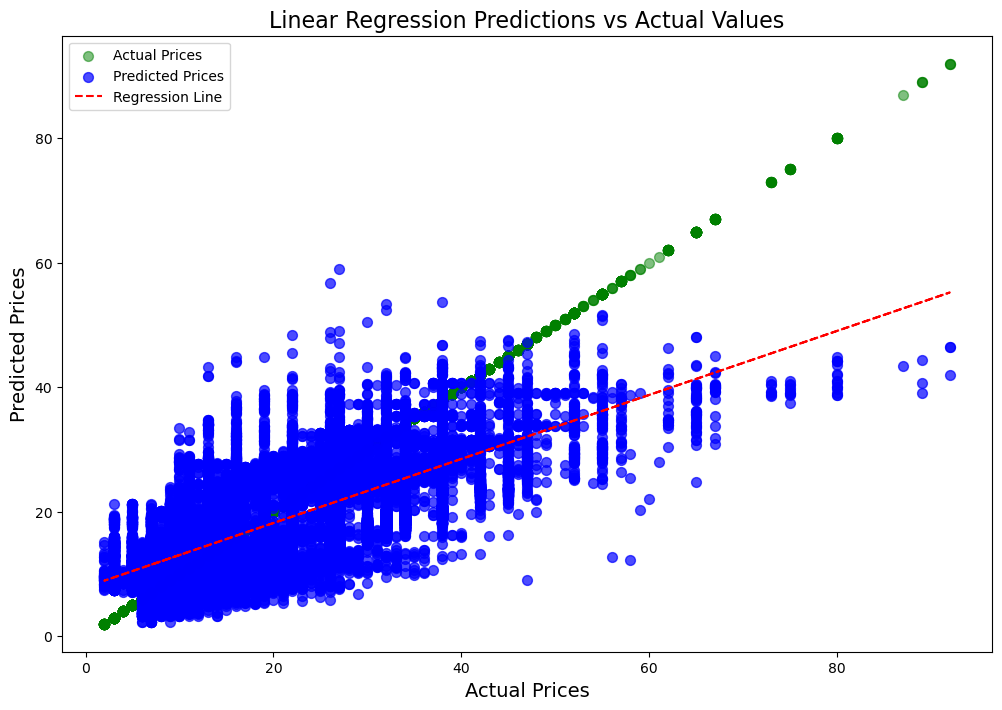

In [281]:
plt.figure(figsize=(12, 8))

plt.scatter(y_test, y_test, color='green', s=50, alpha=0.5, label='Actual Prices')  # Actual prices
plt.scatter(y_test, pred, color='blue', s=50, alpha=0.7, label='Predicted Prices')  # Predicted prices

# Fit a linear regression line
z = np.polyfit(y_test, pred, 1)  
p = np.poly1d(z)  
plt.plot(y_test, p(y_test), color='red', linestyle='--', label='Regression Line')  # Plot the regression line

plt.title('Linear Regression Predictions vs Actual Values', fontsize=16)
plt.xlabel('Actual Prices', fontsize=14)
plt.ylabel('Predicted Prices', fontsize=14)
plt.legend()

plt.show()

## Decision Tree

In [226]:
tree = DecisionTreeRegressor(max_depth=10)
tree.fit(X_train_norm, y_train)

DecisionTreeRegressor(max_depth=10)

In [228]:
X_train_norm

array([[1.        , 0.83333333, 0.28061224, 0.        ],
       [0.        , 0.33333333, 0.40816327, 0.        ],
       [1.        , 0.08333333, 0.20535714, 0.        ],
       ...,
       [1.        , 0.83333333, 0.13903061, 0.        ],
       [0.        , 0.58333333, 0.08035714, 0.        ],
       [0.        , 0.5       , 0.29591837, 0.25      ]])

In [230]:
y_test

526491     7
506474    10
139551     7
235222    15
140436    16
          ..
87288     33
111342     7
201635    18
320604    10
666972    11
Name: price, Length: 127596, dtype: int64

In [232]:
pred = tree.predict(X_test_norm)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", tree.score(X_test_norm, y_test))

MAE 1.1632409358323732
RMSE 1.7633961383994106
R2 score 0.9641236557709525


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [152]:
tree_importance = {feature: importance for feature, importance in zip(X_train.columns, tree.feature_importances_)}
tree_importance

{'cab_type': 0.007306275594626344,
 'name': 0.798628154295523,
 'distance': 0.15174863086308324,
 'surge_multiplier': 0.0423169392467675}

In [234]:
tree_viz = export_text(tree, feature_names=list(X_train.columns))
print(tree_viz)

|--- name <= 0.38
|   |--- distance <= 0.32
|   |   |--- name <= 0.29
|   |   |   |--- cab_type <= 0.50
|   |   |   |   |--- name <= 0.21
|   |   |   |   |   |--- distance <= 0.19
|   |   |   |   |   |   |--- surge_multiplier <= 0.19
|   |   |   |   |   |   |   |--- distance <= 0.12
|   |   |   |   |   |   |   |   |--- surge_multiplier <= 0.06
|   |   |   |   |   |   |   |   |   |--- distance <= 0.10
|   |   |   |   |   |   |   |   |   |   |--- value: [10.59]
|   |   |   |   |   |   |   |   |   |--- distance >  0.10
|   |   |   |   |   |   |   |   |   |   |--- value: [11.49]
|   |   |   |   |   |   |   |   |--- surge_multiplier >  0.06
|   |   |   |   |   |   |   |   |   |--- distance <= 0.09
|   |   |   |   |   |   |   |   |   |   |--- value: [13.00]
|   |   |   |   |   |   |   |   |   |--- distance >  0.09
|   |   |   |   |   |   |   |   |   |   |--- value: [13.08]
|   |   |   |   |   |   |   |--- distance >  0.12
|   |   |   |   |   |   |   |   |--- surge_multiplier <= 0.06
|   |   

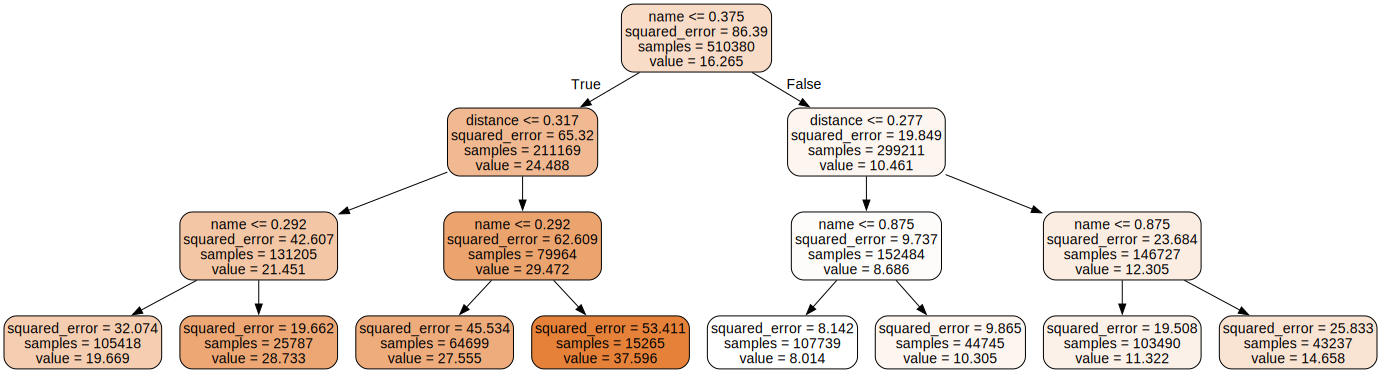

In [168]:
tree = DecisionTreeRegressor(max_depth=30)
tree.fit(X_train_norm, y_train)

# Export the tree visualization to DOT format
dot_data = export_graphviz(
    tree,
    out_file=None,  
    filled=True,
    rounded=True,
    feature_names=X_train.columns 
)
graphviz.Source(dot_data)

In [ ]:
# Save the tree as a PNG file
graph = graphviz.Source(dot_data)
graph.render("decision_tree", format="png", cleanup=True)

In [172]:
X_train_norm_df = pd.DataFrame(X_train_norm, columns = X_train.columns)
X_train_norm_df.name.value_counts()

name
0.750000    44136
0.083333    44130
0.000000    44076
0.916667    44032
0.833333    43987
1.000000    43950
0.416667    41141
0.166667    41054
0.333333    41052
0.500000    41031
0.583333    40934
0.250000    40857
Name: count, dtype: int64

# Decision Tree Regressor

In [303]:
# Define base model
base_model = DecisionTreeRegressor()

# Bagging
bagging_model = BaggingRegressor(estimator=base_model, n_estimators=50, bootstrap=True, random_state=42)
bagging_model.fit(X_train, y_train)
y_pred_bagging = bagging_model.predict(X_test)  

# Pasting
pasting_model = BaggingRegressor(estimator=base_model, n_estimators=50, bootstrap=False, random_state=42)
pasting_model.fit(X_train, y_train)
y_pred_pasting = pasting_model.predict(X_test)  

# Evaluate Bagging model
print("Bagging Results:")
mse_bagging = mean_squared_error(y_test, y_pred_bagging)
r2_bagging = r2_score(y_test, y_pred_bagging)
print(f'Mean Squared Error: {mse_bagging:.2f}')
print(f'R^2 Score: {r2_bagging:.2f}')

# Evaluate Pasting model
print("\nPasting Results:")
mse_pasting = mean_squared_error(y_test, y_pred_pasting)
r2_pasting = r2_score(y_test, y_pred_pasting)
print(f'Mean Squared Error: {mse_pasting:.2f}')
print(f'R^2 Score: {r2_pasting:.2f}')

Bagging Results:
Mean Squared Error: 3.03
R^2 Score: 0.97

Pasting Results:
Mean Squared Error: 3.07
R^2 Score: 0.96


# Random Forest Regressor 

In [323]:
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train_norm, y_train)

y_pred_rf = rf_model.predict(X_test_norm)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest Results:")
print(f'Mean Squared Error: {mse_rf:.2f}')
print(f'R^2 Score: {r2_rf:.2f}')

Random Forest Results:
Mean Squared Error: 3.03
R^2 Score: 0.97


# Gradient Boosting Regressor

In [325]:
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)

mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
print("\nGradient Boosting Results:")
print(f'Mean Squared Error: {mse_gb:.2f}')
print(f'R^2 Score: {r2_gb:.2f}')


Gradient Boosting Results:
Mean Squared Error: 3.61
R^2 Score: 0.96


# Ada Boost Regressor

In [331]:
base_model = DecisionTreeRegressor(max_depth=3)  

ada_model = AdaBoostRegressor(estimator=base_model, n_estimators=50, random_state=42)
ada_model.fit(X_train, y_train)

y_pred_ada = ada_model.predict(X_test)

mse_ada = mean_squared_error(y_test, y_pred_ada)
r2_ada = r2_score(y_test, y_pred_ada)
print("\nAdaptive Boosting Results:")
print(f'Mean Squared Error: {mse_ada:.2f}')
print(f'R^2 Score: {r2_ada:.2f}')


Adaptive Boosting Results:
Mean Squared Error: 29.70
R^2 Score: 0.66
